In [3]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
image = io.imread('D:/image/animal.jpg')

In [10]:
def has_object_in_patch(x, y): return False
patch_size = 32
stride = 8
patches = []
labels = []
for y in range(0, image.shape[0] - patch_size + 1, stride):
    for x in range(0, image.shape[1] - patch_size + 1, stride):
        patch = image[y:y+patch_size, x:x+patch_size]
        patches.append(patch)
        label = 1 if has_object_in_patch(x, y) else 0
        labels.append(label)

patches = np.array(patches)
labels = np.array(labels)

In [12]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.fit(patches, labels, epochs=10, batch_size=32)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9664 - loss: 2.7177
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.3795e-22
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.6900e-22
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 7.6785e-23
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.4487e-23
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 2.0459e-23
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.9893e-23
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 9.6681e-23
Epoch 9/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.4738e-23
Epoch 10/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.2615e-23


In [16]:
predictions = model.predict(patches)

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


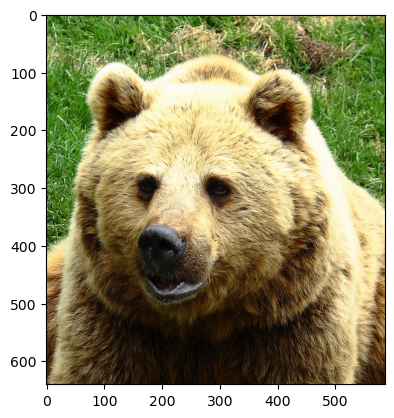

In [18]:
for i, pred in enumerate(predictions):
    if pred > 0.5:  # Object detected
        y = (i // (image.shape[1] // stride)) * stride
        x = (i % (image.shape[1] // stride)) * stride
        cv2.rectangle(image, (x, y), (x + patch_size, y + patch_size), (255, 0, 0), 2)

plt.imshow(image)
plt.show()